# Computer Vision - Cat or a Dog

**In this notebook we are using computer vision to classify cats and dogs.**

- Blog: [henkboelman.com/techdays-finland](https://henkboelman.com/techdays-finland)
- [Cats & Dogs dataset on Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data)
- [Azure Machine Learning Service](https://azure.microsoft.com/en-ca/services/machine-learning-service)

In [3]:
train_data_path = '../Data/train/'
imageListAll = []
counter = 0
for file in os.listdir(train_data_path):
    imageListAll.append(train_data_path + file) 


12500  cat images and  12500  dog images labelled


# Connect to api

In [14]:
from azure.cognitiveservices.vision.computervision import ComputerVisionAPI
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image as PILimage

# Get region and key from environment variables
import os
region = "westeurope"
key = "bd688528919244b5bfad17f5404be2b7"

# Set credentials
credentials = CognitiveServicesCredentials(key)

# Create client
client = ComputerVisionAPI(region, credentials)

# Tags

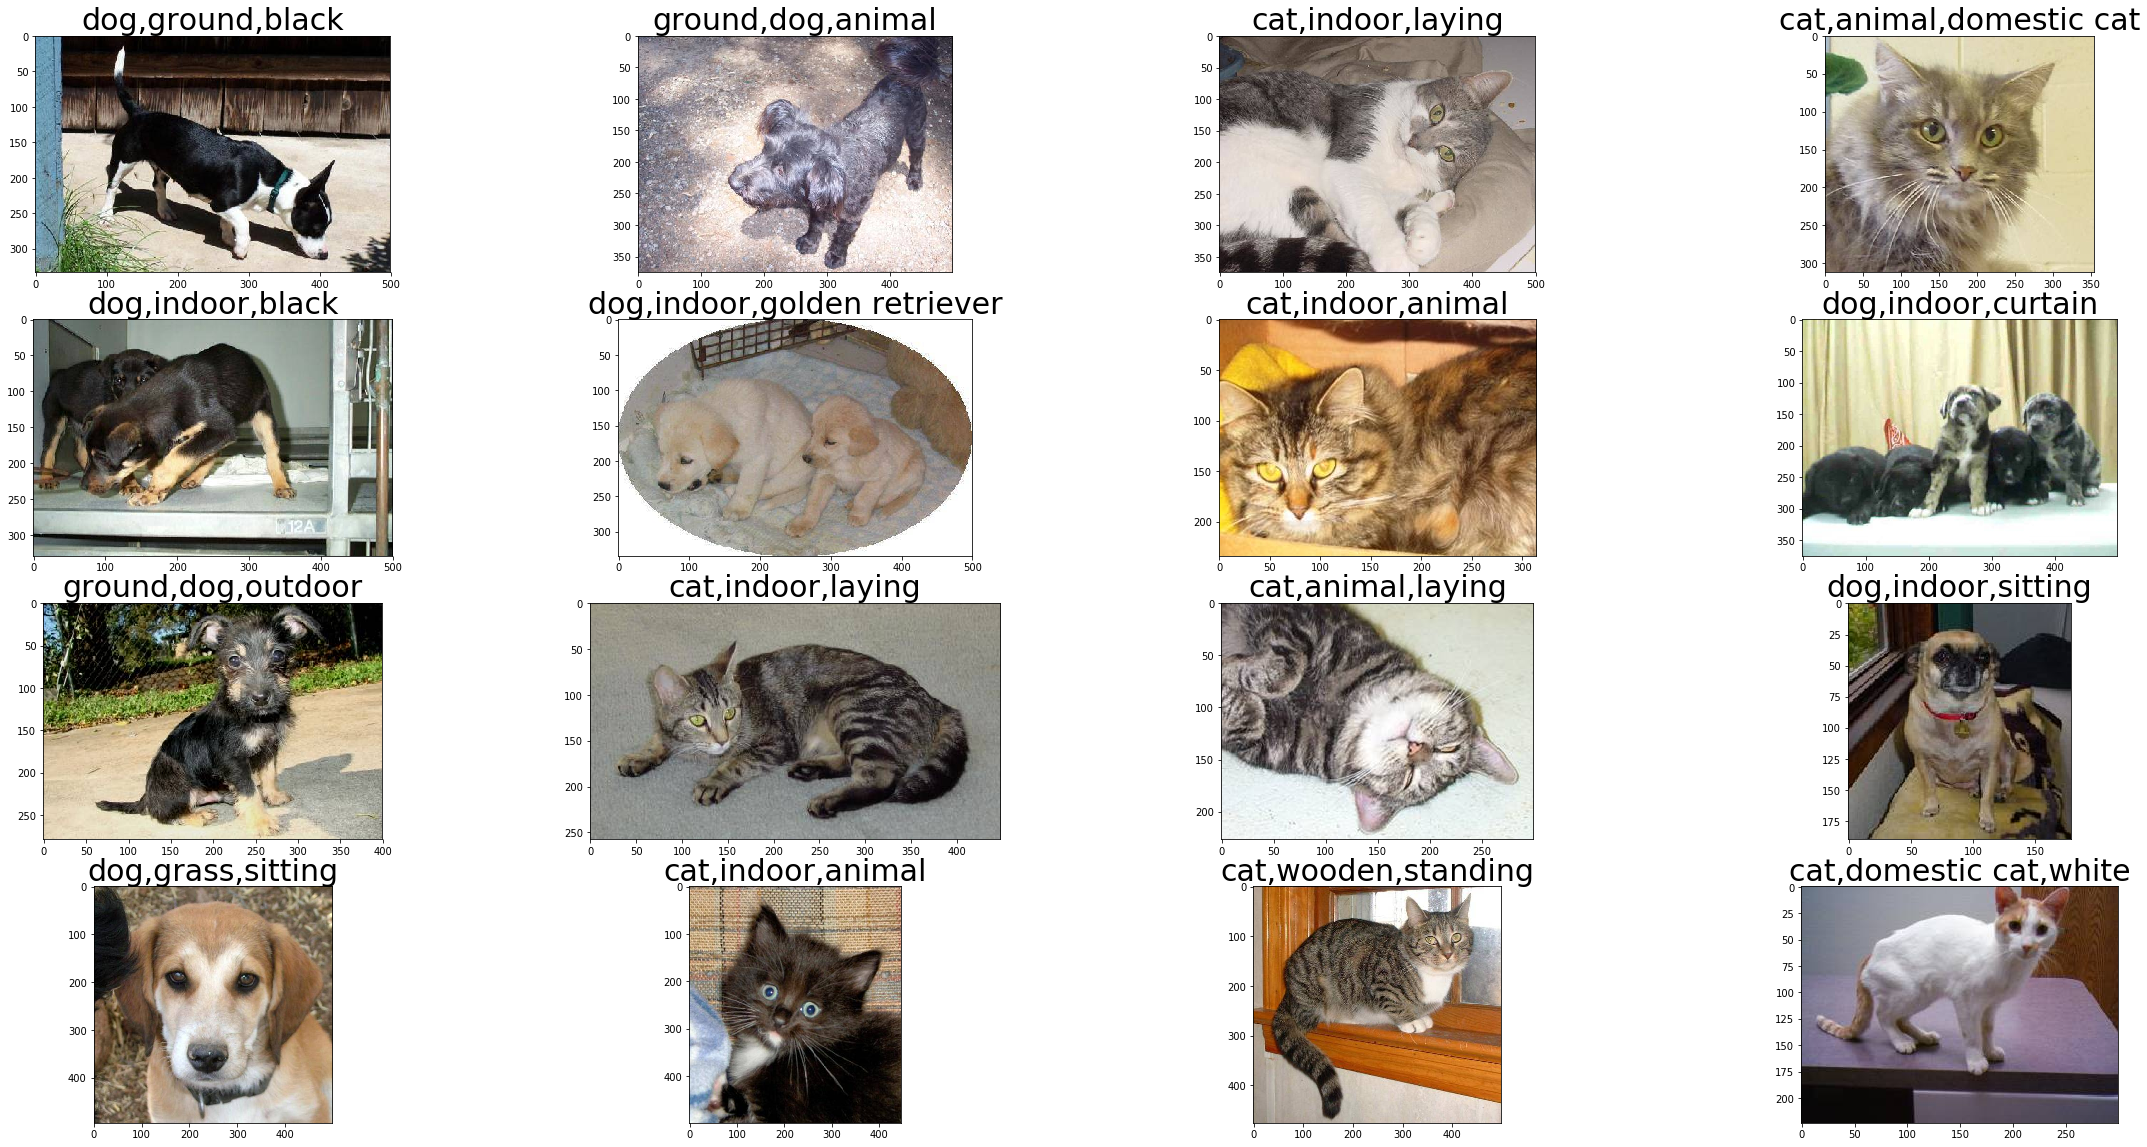

In [24]:
i=1
plt.figure(figsize=(40,20))
random.shuffle(imageListAll)

for image in imageListAll[0:16]:
    with open(os.path.join(image), "rb") as image_stream:
        image_analysis = client.analyze_image_in_stream(
            image_stream,
            visual_features=[
                VisualFeatureTypes.tags
            ]
        )
    score = image_analysis.tags[0].name +"," + image_analysis.tags[1].name+"," + image_analysis.tags[2].name
    im = PILimage.open(image)    
    plt.subplot(4, 4, i)
    plt.title(score, fontsize=30)
    plt.imshow(im)
    i+=1

plt.show()
        

# Descriptions

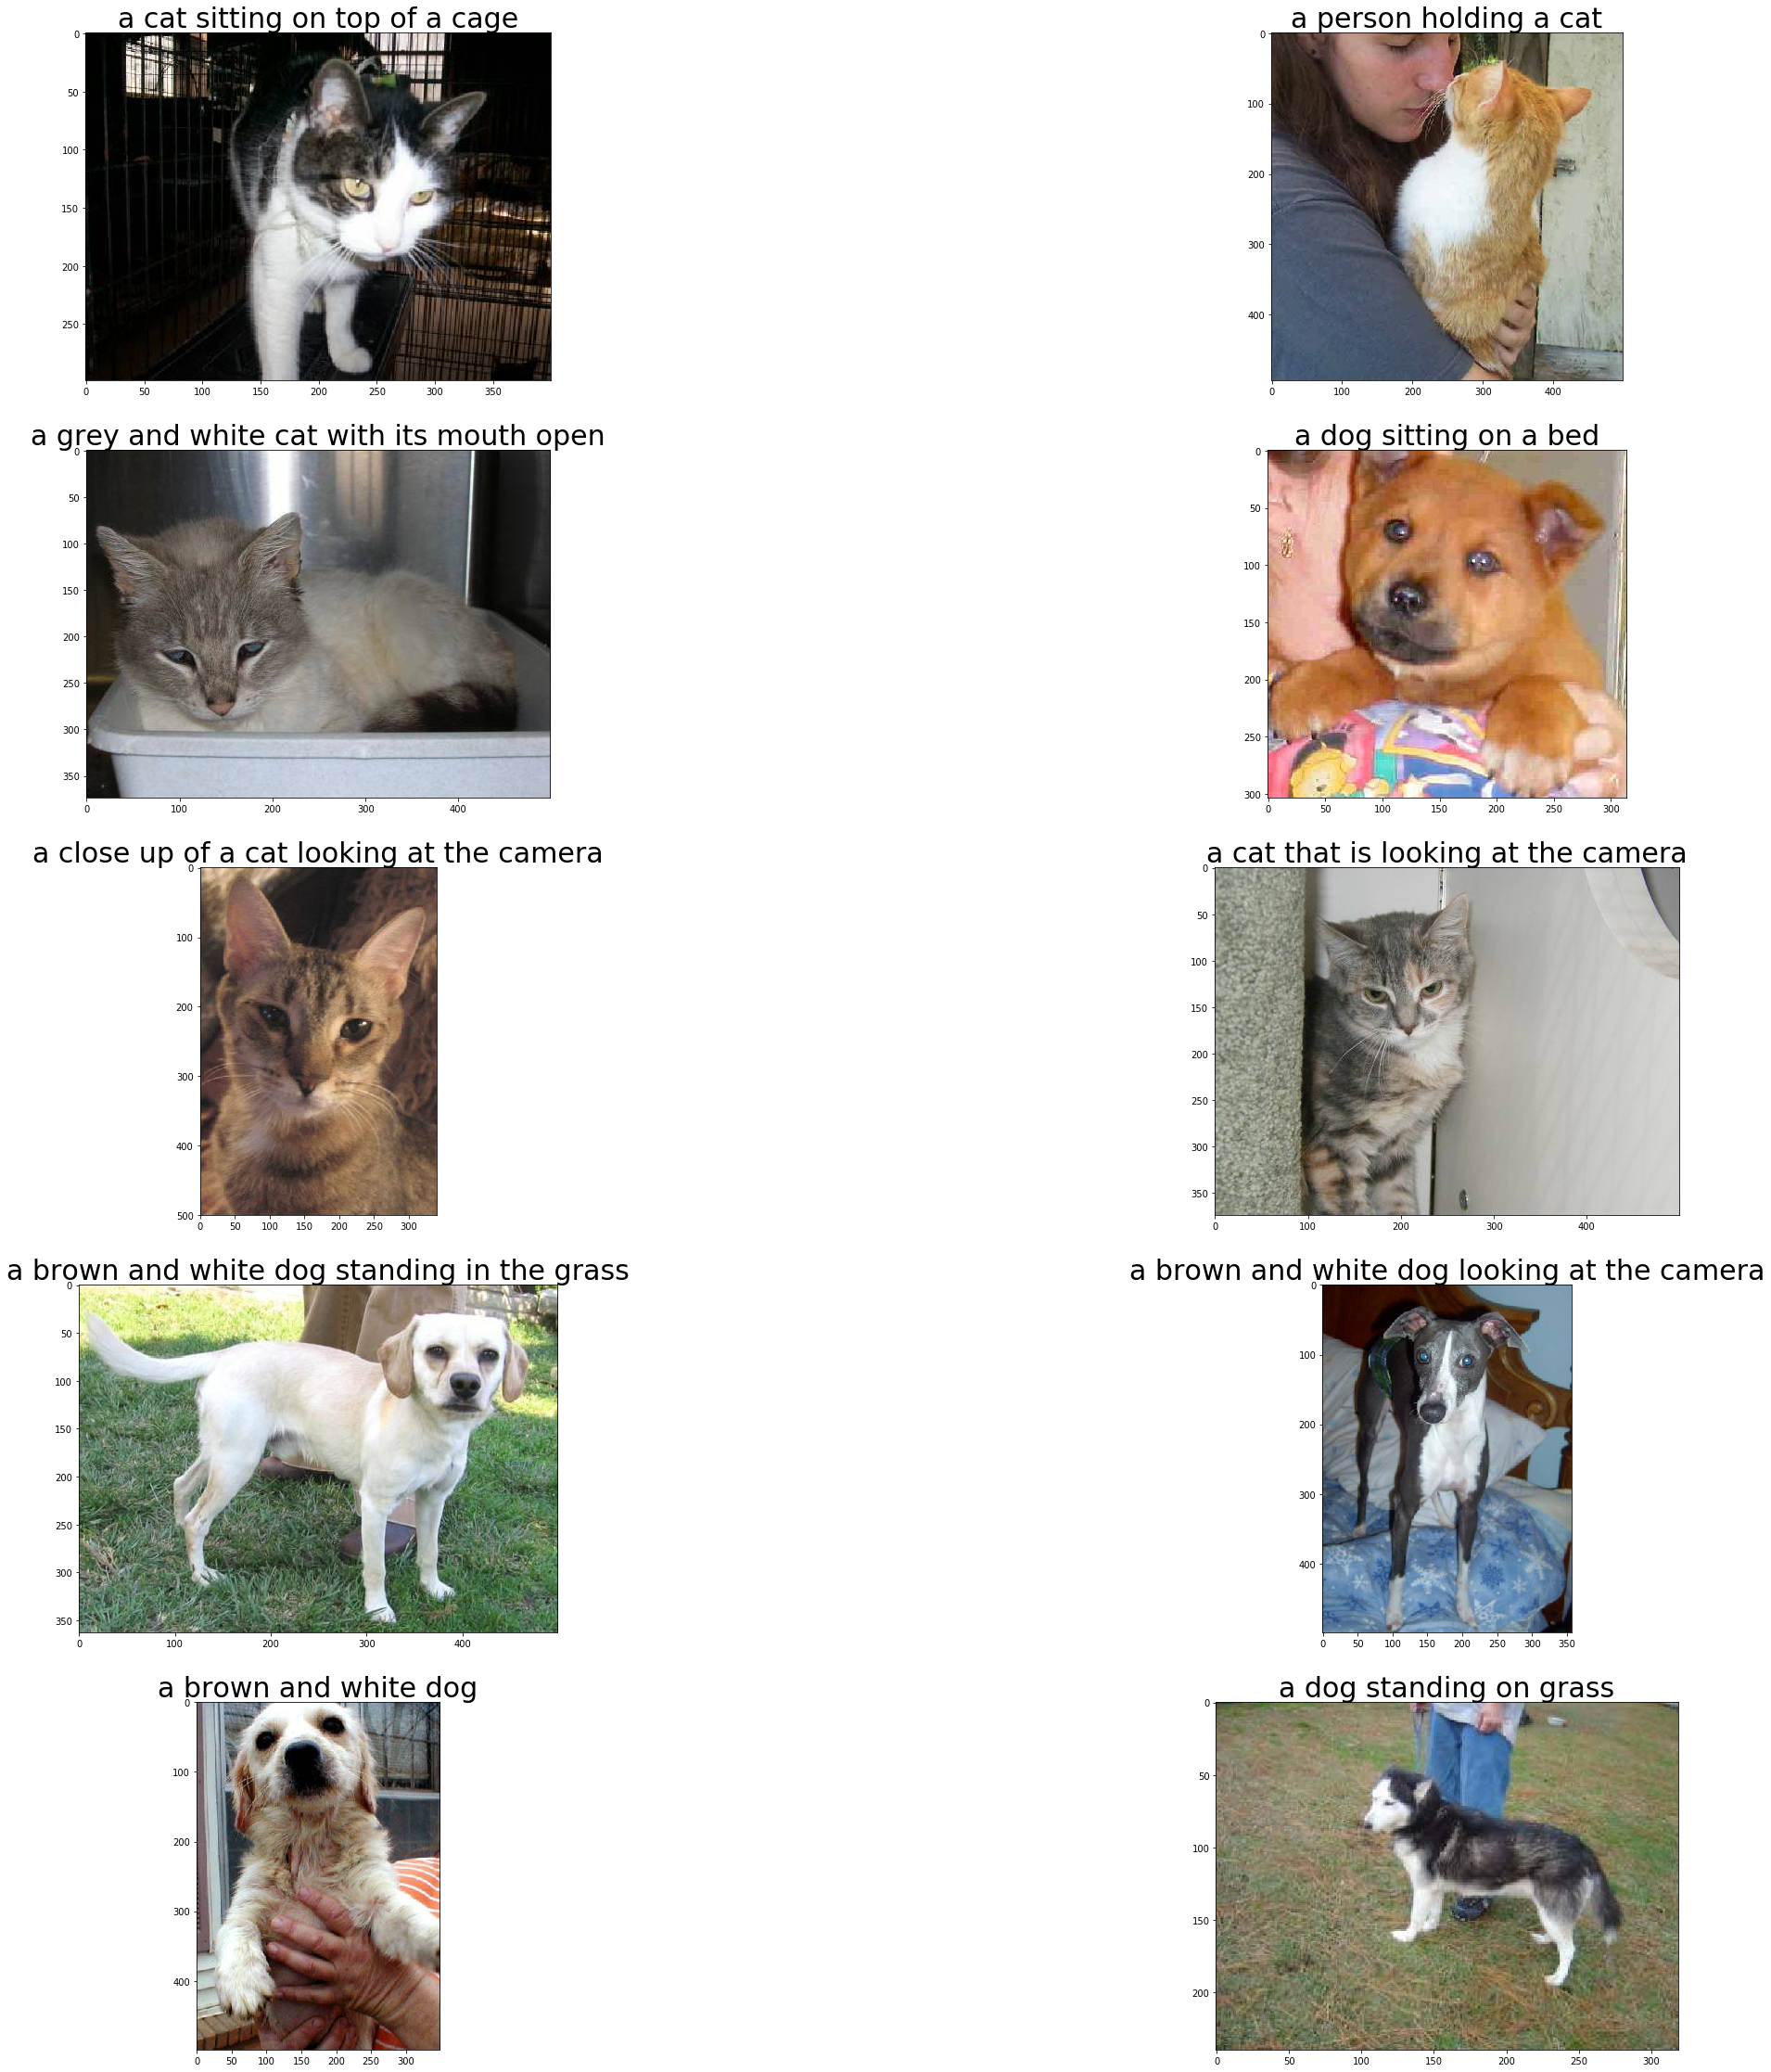

In [35]:
i=1
plt.figure(figsize=(40,40))
random.shuffle(imageListAll)

for image in imageListAll[0:10]:
    with open(os.path.join(image), "rb") as image_stream:
        image_analysis = client.analyze_image_in_stream(
            image_stream,
            visual_features=[
                VisualFeatureTypes.description # Could use simple str "Description"
            ]
        )
    score = image_analysis.description.captions[0].text
    im = PILimage.open(image)    
    plt.subplot(5, 2, i)
    plt.title(score, fontsize=30)
    plt.imshow(im)
    i+=1

plt.show()

# Extended features

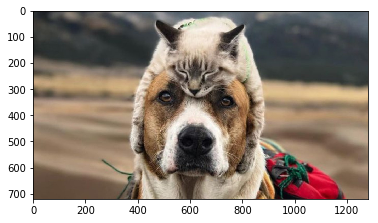

In [44]:
img=plt.imread('../data/dogwithcat.jpg')
plt.title('', fontsize=16)
plimg = plt.imshow(img)

In [40]:
with open(os.path.join('../data/dogwithcat.jpg'), "rb") as image_stream:
    image_analysis = client.analyze_image_in_stream(
        image_stream,
        visual_features=[
            VisualFeatureTypes.adult,
            VisualFeatureTypes.image_type, # Could use simple str "ImageType"
            VisualFeatureTypes.color,      # Could use simple str "Color"
            VisualFeatureTypes.tags,       # Could use simple str "Tags"
            VisualFeatureTypes.description # Could use simple str "Description"
        ]
    )
    
print("IsAdult: ", image_analysis.adult.is_adult_content, "Score: ", image_analysis.adult.adult_score)
print("Is Racy: ", image_analysis.adult.is_racy_content, "Score: ", image_analysis.adult.racy_score)

IsAdult:  False Score:  0.007533907424658537
Is Racy:  False Score:  0.009039250202476978


In [41]:
print(image_analysis.color)

{'additional_properties': {'isBwImg': False}, 'dominant_color_foreground': 'White', 'dominant_color_background': 'Grey', 'dominant_colors': ['Grey'], 'accent_color': 'BC0F2F', 'is_bw_img': False}


In [45]:
print(image_analysis.image_type)

{'additional_properties': {}, 'clip_art_type': 0.0, 'line_drawing_type': 0.0}


In [52]:
print(image_analysis.description.captions[0].text)

a dog looking at the camera


In [51]:
for tag in image_analysis.tags:
    print(tag.name, tag.confidence)

dog 0.9991874098777771
animal 0.9388580918312073
mammal 0.8126822113990784
